In [1]:
from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, load_mpl_presets
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import warnings
import random
import vice
import sys
load_mpl_presets()
warnings.filterwarnings("ignore")
print(sys.version_info)

sys.version_info(major=3, minor=10, micro=2, releaselevel='final', serial=0)


/Users/astrobeard/Work/Research/VICErepos/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [2]:
outputs = [
    "../outputs/inside-out/vrad0",
    "../outputs/inside-out/vrad1",
    "../outputs/inside-out/vrad2",
    "../outputs/inside-out/vrad3"
]
radial_velocities = [0, -1, -2, -3]
outputs = [vice.multioutput(_) for _ in outputs]
for out in outputs:
    extra = np.genfromtxt("%s_analogdata.out" % (out.name))
    zfinal = [row[-1] for row in extra]
    out.stars["absz"] = [abs(z) for z in zfinal][:out.stars.size[0]]

0 9 N stellar pops: 74015
10 19 N stellar pops: 68022
20 29 N stellar pops: 55607
30 39 N stellar pops: 60567
40 49 N stellar pops: 50389
50 59 N stellar pops: 49975
60 69 N stellar pops: 54548
70 79 N stellar pops: 52922
80 89 N stellar pops: 48317
90 99 N stellar pops: 35997
100 109 N stellar pops: 31680
110 119 N stellar pops: 24314
120 129 N stellar pops: 16605
130 139 N stellar pops: 11763
140 149 N stellar pops: 8542
0 9 N stellar pops: 73790
10 19 N stellar pops: 74308
20 29 N stellar pops: 63175
30 39 N stellar pops: 64714
40 49 N stellar pops: 55481
50 59 N stellar pops: 50427
60 69 N stellar pops: 52584
70 79 N stellar pops: 47502
80 89 N stellar pops: 40201
90 99 N stellar pops: 43585
100 109 N stellar pops: 34364
110 119 N stellar pops: 28212
120 129 N stellar pops: 22094
130 139 N stellar pops: 20492
140 149 N stellar pops: 18492
0 9 N stellar pops: 77117
10 19 N stellar pops: 78444
20 29 N stellar pops: 72186
30 39 N stellar pops: 69627
40 49 N stellar pops: 57747
50 59 N

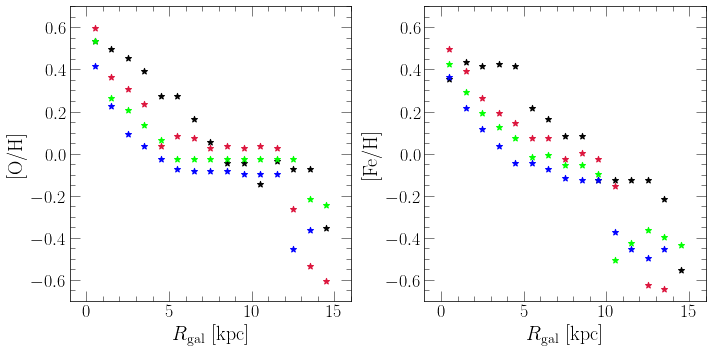

In [3]:
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for ax in [ax1, ax2]:
    ax.set_xlabel(r"$R_\text{gal}$ [kpc]")
    ax.set_xlim([-1, 16])
    ax.set_ylim([-0.7, 0.7])
ax1.set_ylabel("[O/H]")
ax2.set_ylabel("[Fe/H]")

def mode(bins, dist):
    idxmax = dist.index(max(dist))
    return (bins[idxmax] + bins[idxmax + 1]) / 2

zone_width = 0.1
radial_bins = list(range(0, 16, 1))
colors = ["black", "crimson", "lime", "blue"]

for i, out in enumerate(outputs):
    for j in range(len(radial_bins) - 1):
        inner_zone = int(radial_bins[j] / zone_width)
        outer_zone = int(radial_bins[j + 1] / zone_width - 1)
        stars = out.stars.filter(
            "zone_final", ">=", inner_zone).filter(
            "zone_final", "<=", outer_zone).filter(
            "absz", "<=", 0.5).filter(
            "mass", ">=", 1)
        print(inner_zone, outer_zone, "N stellar pops: %d" % (len(stars["absz"])))
        bins = [-3 + 0.01 * _ for _ in range(601)]
        mdf, _ = np.histogram(stars["[o/h]"], bins = bins, density = True, weights = stars["mass"])
        mode_ = mode(bins, mdf.tolist())
        radius = (radial_bins[j] + radial_bins[j + 1]) / 2
        kwargs = {
            "c": named_colors()[colors[i]],
            "marker": markers()["star"], 
            "s": 40
        }
        ax1.scatter(radius, mode_, **kwargs)
        mdf, _ = np.histogram(stars["[fe/h]"], bins = bins, density = True, weights = stars["mass"])
        mode_ = mode(bins, mdf.tolist())
        radius = (radial_bins[j] + radial_bins[j + 1]) / 2
        ax2.scatter(radius, mode_, **kwargs)

plt.tight_layout()
plt.show()